In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


# Descripción de los datos

In [4]:
# Load data
data = pd.read_csv("./datasets/population_data.csv")
values = {}
for country in data['Entity'].unique():
    country_data = data[data['Entity']==country]['Population (historical estimates)'].sort_values(ascending=True)
    medians = country_data.groupby(np.arange(len(country_data))//20).median()
    values[country] = medians


In [5]:
medians = pd.DataFrame(values).T
e = { i: f"{j}" for i, j in zip(range(12), range(1800, 2021, 20)) }
medians = medians.rename(columns = e, inplace = False)
medians

,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,2020
Afghanistan,3.280000e+06,3.422158e+06,3.743668e+06,4.132643e+06,4.564999e+06,5.574658e+06,7.134298e+06,8.700904e+06,1.103371e+07,1.334885e+07,2.879016e+07,3.938188e+07
Africa,8.229059e+07,9.103397e+07,1.117259e+08,1.217634e+08,1.347619e+08,1.437889e+08,1.689648e+08,2.255226e+08,3.588312e+08,6.219309e+08,1.026175e+09,1.357042e+09
Albania,4.171725e+05,4.560505e+05,4.998755e+05,6.035630e+05,7.309835e+05,8.841275e+05,1.000234e+06,1.251535e+06,2.125221e+06,2.888476e+06,3.120358e+06,3.283234e+06
Algeria,2.588080e+06,2.735465e+06,2.845354e+06,3.444708e+06,4.200138e+06,5.386130e+06,6.379638e+06,8.799424e+06,1.426336e+07,2.543253e+07,3.565567e+07,4.423383e+07
American Samoa,6.270500e+03,2.326250e+04,3.873350e+04,5.572800e+04,5.910900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,8.345000e+02,4.863850e+04,1.798440e+05,4.271600e+05,5.673960e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
World,1.019597e+09,1.162759e+09,1.276047e+09,1.344597e+09,1.530073e+09,1.785196e+09,2.092875e+09,2.518714e+09,3.663183e+09,5.282485e+09,6.915108e+09,7.834882e+09
Yemen,2.593000e+06,2.638226e+06,2.736015e+06,2.811800e+06,2.889150e+06,3.179767e+06,3.820290e+06,4.628948e+06,6.145210e+06,1.144959e+07,2.283566e+07,3.015830e+07
Zambia,8.627505e+05,1.168202e+06,1.467224e+06,1.562576e+06,1.597329e+06,1.610027e+06,1.660064e+06,2.286067e+06,4.112401e+06,7.928524e+06,1.341056e+07,1.865231e+07


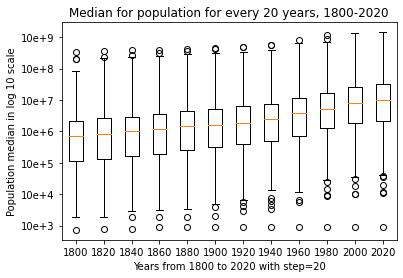

In [8]:
means = medians.dropna()
plt.boxplot(np.log10(means[means['1800']<7e+08]))
plt.title('Median for population for every 20 years, 1800-2020')
x_ticks = [1800+i for i in range(0,221, 20 )]
x_range = [i for i in range(1, 13)]
plt.xticks( x_range, x_ticks )
y_ticks = [ f"10e+{i}" for i in range(3, 10) ]
y_range = [i for i in range(3, 10)]
plt.yticks( y_range, y_ticks )
plt.xlabel('Years from 1800 to 2020 with step=20')
plt.ylabel('Population median in log 10 scale')
plt.show()

F:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

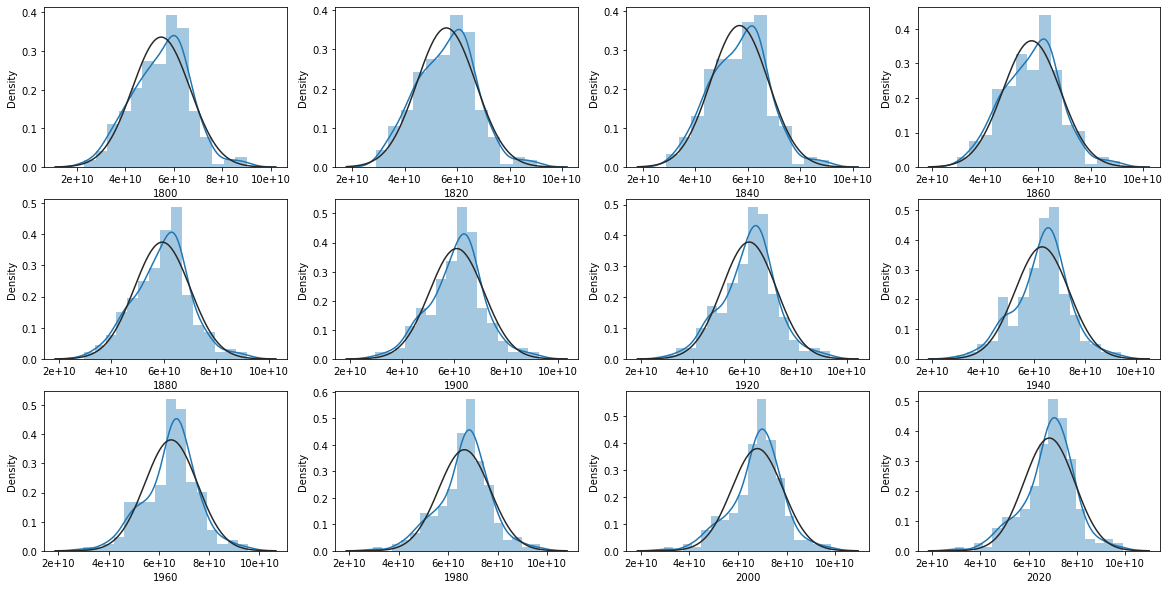

In [18]:
log_means = np.log10(medians)
fig, ax = plt.subplots(3,4, figsize=(20,10))
for row in range(0,12,4):
    for col, year in enumerate(log_means.columns[row:row+4]):
        plt.sca(ax[row//4, col])
        plt.xticks([2,4,6,8,10], [f"{i}e+10" for i in range(2, 11, 2)])
        sns.distplot( log_means[year], fit = norm, ax = ax[row//4][col])



# Mapas y gráficas relacionadas

In [30]:
# Load data
data = pd.read_csv("./datasets/population_edited.csv")
# All united states data
usa = data[data["Entity"] == "United States"]
# All china data
chn = data[data["Entity"] == "China"]


In [19]:
def get_slider(data, column, locat, z_, title, yr_i, yr_f, is_string=False, log=True):
    slider = []
    for year in range(yr_i, yr_f):
        segmented = data[data[(column)]==year]
        if is_string:
            segmented = data[data[(column)]==f'{year}']
        z = segmented[z_].astype(float)/100000
        data_each = dict(
            type = 'choropleth',
            locations = segmented[locat],
            z = z,
            locationmode = 'ISO-3',
            colorscale = 'Turbo',
            colorbar = {'title':title}
        )
        slider.append(data_each)
    return slider


## Mapa coroplético para el GDP per cápita entre 1960 y 2020 con proyección Mollweide 

In [25]:
gdp = pd.read_csv('./datasets/gdp_per_capita.csv')
gdp = gdp[gdp['Country Name'].isin(data['Entity'])]
temp = gdp.melt(id_vars=['Country Name', 'Code'], var_name='Year', value_name='gdp')
slider = get_slider(temp, 'Year', 'Code', 'gdp','gdp', 1960, 2021, True, False)
steps = []
for i in range(len(slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(slider)],
                label='Year {}'.format(i + 1960))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title ='GDP per capita since 1960', geo=dict(scope='world',
                       projection={'type': 'mollweide'}),
              sliders=sliders)

fig = go.Figure(data=slider, layout=layout)
fig.show()

## Mapa coroplético poblacional entre 1800 y 2020 con proyección Mollweide  

In [26]:

slider = get_slider(data, 'Year', 'Code', "Population (historical estimates)", "Population (historical estimates)", 1960, 2021)
steps = []
for i in range(len(slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(slider)],
                label='Year {}'.format(i + 1800))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title ='Population change per year since 1800', geo=dict(scope='world',
                       projection={'type': 'mollweide'}),
              sliders=sliders)

fig = go.Figure(data=slider, layout=layout)
fig.show()

# China vs USA

In [22]:
# Population tendency graph for United Sates
x_axis = usa["Year"]
y_axis = usa["Population (historical estimates)"]
fig = px.line(x=x_axis, y=y_axis, title="Population Grouth Graph of USA (1800-2020)")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Population")

In [31]:
# Population tendency graph for United Sates
x_axis = chn["Year"]
y_axis = chn["Population (historical estimates)"]
fig = px.line(x=x_axis, y=y_axis, title="Population Growth Graph of China (1800-2020)")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Population")

In [29]:
trace1 = go.Scatter(
    name = "USA",
    x = list(usa["Year"]),
    y = list(usa["Population (historical estimates)"])
)

trace2 = go.Scatter(
    name = "CHINA",
    x = list(chn["Year"]),
    y = list(chn["Population (historical estimates)"])
)

layout = go.Layout(
    title = "Population Growth",
    yaxis = dict(title='Population'),
    xaxis = dict(title = "Year")
    )

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
fig

In [32]:
population = pd.read_csv('./datasets/urban-vs-rural-majority.csv')
# All united states data
usa = population[population["Entity"] == "United States"]

# All china data
chn = population[population["Entity"] == "China"]

trace1 = go.Scatter(
    name = "USA",
    x = list(usa["Year"]),
    y = list(usa["Urban population (%) long-run with 2050 projections (OWID)"])
)

trace2 = go.Scatter(
    name = "CHINA",
    x = list(chn["Year"]),
    y = list(chn["Urban population (%) long-run with 2050 projections (OWID)"])
)

layout = go.Layout(
    title = "Urban Population Percentage Growth",
    yaxis = dict(title='Urban Population %'),
    xaxis = dict(title = "Year"),
    shapes = [
        {'type':'rect', 'x0':1500, 'y0':50, 'x1':2050, 'y1':50, 'line':{ 'dash':'dash' }},
        {'type':'rect', 'x0':2020, 'y0':0, 'x1':2020, 'y1':100, 'line':{ 'dash':'dash' }}
        ]
    )

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
fig

# GDP

In [33]:
usa_gdp = gdp[gdp['Country Name']=='United States']
china_gdp = gdp[gdp['Country Name']=='China']

trace1 = go.Scatter(
    name = "USA GDP",
    x = np.linspace(1960, 2021),
    y = usa_gdp.values[0,2:]
)

trace2 = go.Scatter(
    name = "CHINA GDP",
    x = np.linspace(1960, 2021),
    y = china_gdp.values[0,2:]
)

layout = go.Layout(
    title = "GDP per capita from 1960 to 2021",
    yaxis = dict(title='GDP per capita'),
    xaxis = dict(title = "Year"))

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
fig

## Gráfica de dispersión entre la población y el GDP per capita mundial en 2020

(188, 4) (188, 4)


Text(0.5, 1.0, 'Population vs GDP per capita 2020')

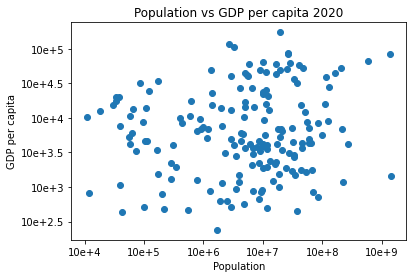

In [39]:
data = pd.read_csv("./datasets/population_data.csv")
x = data[(data["Entity"].isin(temp['Country Name'])) & (data['Year']==2020)]
y = temp[(temp['Country Name'].isin(data['Entity'])) & (temp['Year']=='2020')]
print(x.shape, y.shape)
plt.scatter( x = np.log10(x[x['Year']==2020]['Population (historical estimates)']), y=np.log10(y[y['Year']=='2020']['gdp']) )
plt.ylabel("GDP per capita")
plt.xlabel('Population')
x_ = [4,5,6,7,8,9]
y = [2.5, 3, 3.5, 4, 4.5, 5]
plt.yticks(y,list(map(lambda x: f"10e+{x}", y)) )
plt.xticks(x_, list(map(lambda x: f"10e+{x}", x_)))
plt.title('Population vs GDP per capita 2020')